## Overview

### Data understanding

* Read parquet file
* make an exploratory data analysis

### Importing libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from plotly.subplots import make_subplots
import plotly.graph_objects as go

### Loading data

In [2]:
df = pd.read_parquet("../data/processed/avc-cuiaba.parquet")
df

,data,co_ppb,no2_ppb,o3_ppb,pm25_ugm3,so2_ugm3,TMAX,UR,PRESS,DS,LAG0,LOAVC
0,2016-01-01,192.8,1.8,12.7,20.8,1.4,31.6,87.00,983.029167,0,2,0
1,2016-01-02,222.7,2.6,12.4,19.6,1.7,33.9,75.75,983.408333,1,4,0
2,2016-01-03,214.2,2.4,14.5,19.1,1.5,28.1,88.50,983.854167,1,2,1
3,2016-01-04,236.6,2.8,17.9,24.9,1.8,34.8,75.75,982.791667,0,8,1
4,2016-01-05,218.3,2.6,14.0,18.5,1.8,31.1,83.50,984.125000,0,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...
1091,2018-12-27,176.2,3.7,13.7,23.0,2.5,33.5,73.00,981.450000,0,5,2
1092,2018-12-28,133.3,1.1,10.0,13.0,1.0,31.7,82.50,982.395833,0,7,0
1093,2018-12-29,136.1,1.0,11.5,13.8,0.9,31.2,80.50,982.372727,0,3,1
1094,2018-12-30,127.7,0.8,13.5,12.9,0.8,30.5,70.25,984.550000,1,2,0


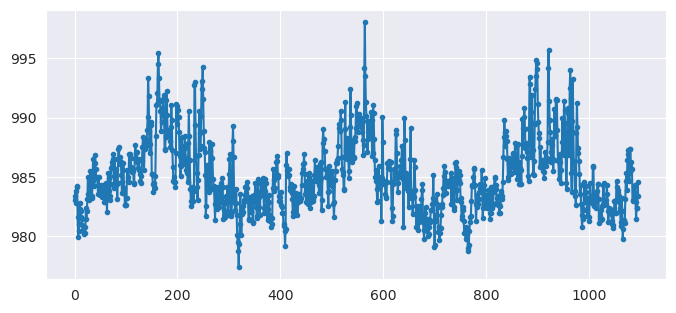

In [3]:
df["PRESS"].plot(grid=True, marker=".", figsize=(8, 3.5))
plt.show()

In [47]:
def data_subplots(df: pd.DataFrame, start: "2016-01", end: "2018-12"):

    fig = make_subplots(rows=3, cols=2,
                        subplot_titles=("Pressure", "co_ppb", "pm25_ugm3", "so2_ugm3", "LAG0"))

    fig.add_trace(
        go.Scatter(x=df[(df["data"] >= start) & (df.data <= end)].data, y=df[(df["data"] >= start) & (df.data <= end)].PRESS),
        row=1, col=1
    )

    fig.add_trace(
        go.Scatter(x=df[(df["data"] >= start) & (df.data <= end)].data, y=df[(df["data"] >= start) & (df.data <= end)].co_ppb),
        row=1, col=2
    )

    fig.add_trace(
        go.Scatter(x=df[(df["data"] >= start) & (df.data <= end)].data, y=df[(df["data"] >= start) & (df.data <= end)].pm25_ugm3),
        row=2, col=1
    )

    fig.add_trace(
        go.Scatter(x=df[(df["data"] >= start) & (df.data <= end)].data, y=df[(df["data"] >= start) & (df.data <= end)].so2_ugm3),
        row=2, col=2
    )

    fig.add_trace(
        go.Scatter(x=df[(df["data"] >= start) & (df.data <= end)].data, y=df[(df["data"] >= start) & (df.data <= end)].LOAVC),
        row=3, col=1
    )

    fig.update_layout(height=700, width=800, title_text="Pressure and internation line charts")
    fig.show()

In [51]:
data_subplots(df, "2016-01", "2016-12-31")